Cluster
1    714
0    680
2    571
Name: count, dtype: int64


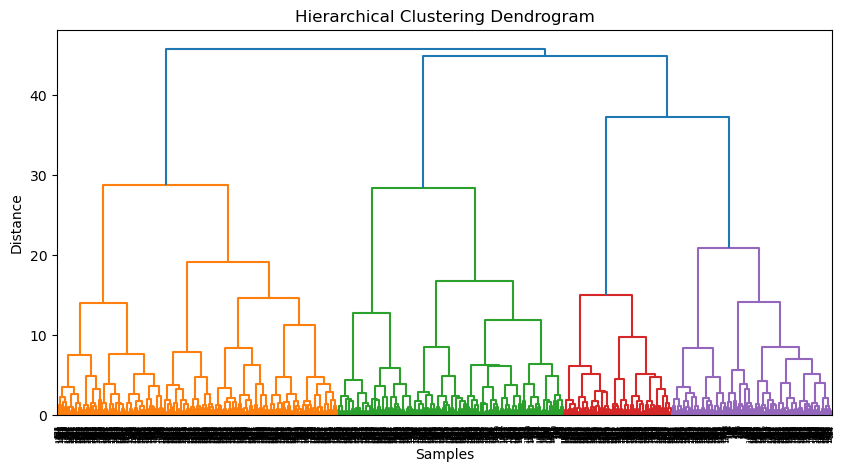

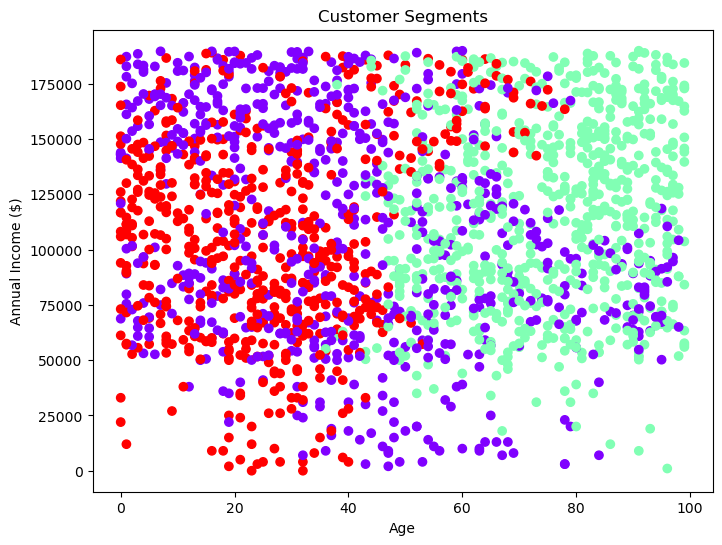

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("Customer Segmentation export 2025-08-04 10-15-08.csv")

# Check and clean null values
df = df.dropna()  # Drop rows with missing values

# Optional: Remove duplicates if any
df = df.drop_duplicates()

# Select relevant numeric features
X = df[["Age", "Annual Income ($)", "Spending Score (1-100)"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = clusters

# Print cluster counts
print(df["Cluster"].value_counts())

# Plot dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Plot clusters in 2D (Age vs Income)
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Annual Income ($)"], c=df["Cluster"], cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.title("Customer Segments")
plt.show()



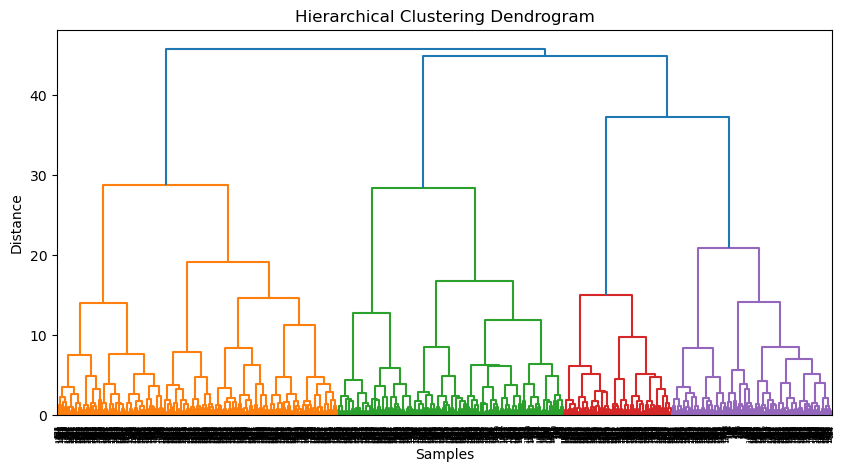

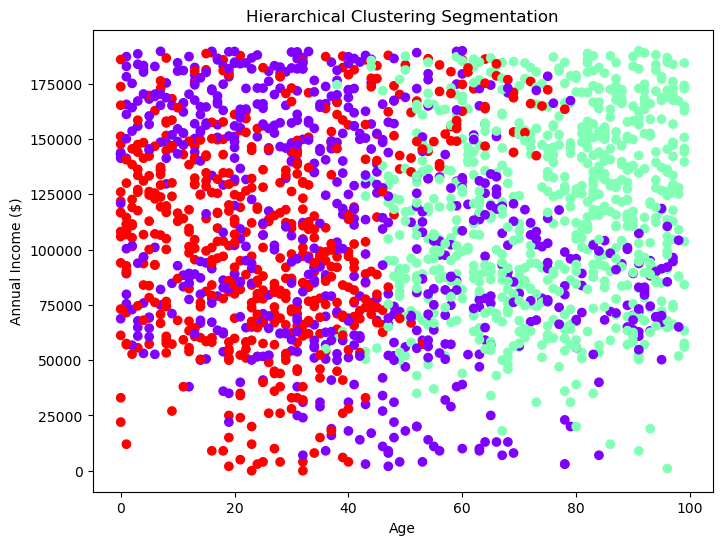

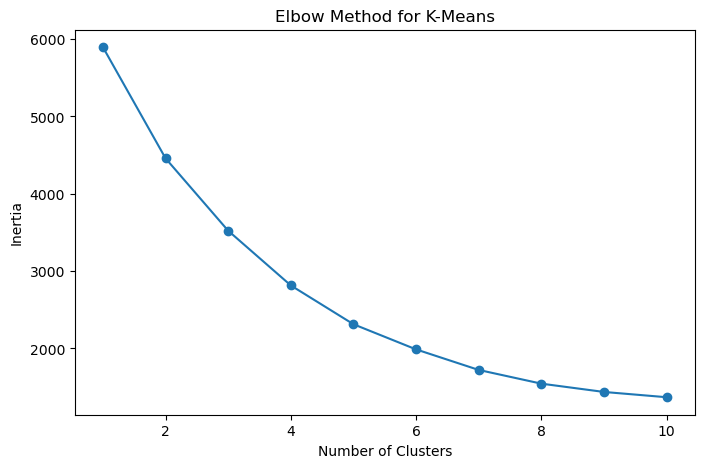

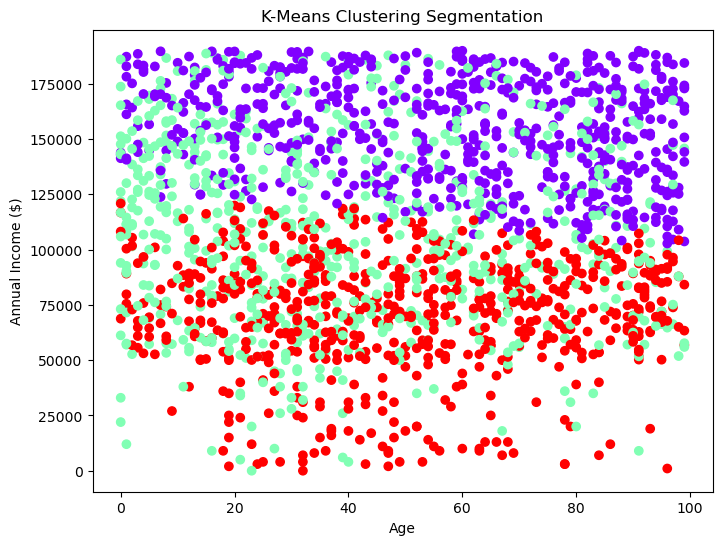


Hierarchical Clustering Segmentation Summary:
                    Age  Annual Income ($)  Spending Score (1-100)
Hier_Cluster                                                      
0             40.388235      108935.052941               24.789706
1             75.141457      116436.757703               58.378151
2             26.204904      105339.366025               73.259194

K-Means Clustering Segmentation Summary:


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("Customer Segmentation export 2025-08-04 10-15-08.csv")

# Clean data
df = df.dropna().drop_duplicates()

# Select features
X = df[["Age", "Annual Income ($)", "Spending Score (1-100)"]]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- Hierarchical Clustering ----------------
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Fit Hierarchical Clustering
hier_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_clusters = hier_model.fit_predict(X_scaled)
df["Hier_Cluster"] = hier_clusters

# Plot Hierarchical Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Annual Income ($)"], c=df["Hier_Cluster"], cmap='rainbow')
plt.title("Hierarchical Clustering Segmentation")
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.show()

# ---------------- K-Means Clustering ----------------
# Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Fit K-Means (using 3 clusters for comparison)
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(X_scaled)
df["KMeans_Cluster"] = kmeans_clusters

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Annual Income ($)"], c=df["KMeans_Cluster"], cmap='rainbow')
plt.title("K-Means Clustering Segmentation")
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.show()

# ---------------- Segmentation Summary ----------------
print("\nHierarchical Clustering Segmentation Summary:")
print(df.groupby("Hier_Cluster")[["Age", "Annual Income ($)", "Spending Score (1-100)"]].mean())

print("\nK-Means Clustering Segmentation Summary:")
print(df.groupby("KMeans_Cluster")["Age", "Annual Income ($)", "Spending Score (1-100)"].mean())
